In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

###### 读写文件
创建一个单位矩阵并将其存储到文件中

In [2]:
i2 = np.eye(2) # 创建一个二维单位矩阵数组
print(i2)
np.savetxt('eye.txt',i2) # 用savetxt函数进行写文件的操作

[[ 1.  0.]
 [ 0.  1.]]


###### 读入CSV文件
载入苹果公司的历史股价数据为例。股价数据存储在CSV中，第一列为股票代码，第二列为dd-mm-yyyy格式日期，第三列为空，随后各列依次为开盘价、最高价、最低价和收盘价，最后一列为当日的成交量。

In [3]:
# 用loadtxt函数读取csv文件，用delimiter参数指定文件中的分隔符
# 用usecols参数指定要导入的数据列，将unpack参数设置为True使不同列的数据分开存储
c, v = np.loadtxt('data.csv',delimiter=',', usecols=(6,7), unpack=True)

###### 成交量加权平均价格（VWAP）
VWAP是一个非常重要的经济学量，代表着金融资产的“平均”价格。某个价格的成交量越高，该价格所占的权重就越大。VWAP就是以成交量为权重计算出来的加权平均值，常用于算法交易。

In [4]:
vmap = np.average(c, weights=v) 
print("VWAP = " + str(vmap))

VWAP = 350.589549353


###### 算术平均值

In [5]:
mean = np.mean(c)
print ("算术平均值mean = " + str(mean))

算术平均值mean = 351.037666667


###### 时间加权平均价格（TWAP）
在经济学中，TWAP是另一种“平均”价格的指标。基本思想就是最近的价格重要性大一些，所以应对近期的价格给以较高的权重。最简单的方法是用arange函数创建一个从0开始依次增长的自然数序列，自然数的个数即为收盘价的个数。这并不一定是正确的计算TWAP的方式，示例仅仅是为了说明问题。

In [6]:
t = np.arange(len(c))
twap = np.average(c, weights=t)
print("TWAP = " + str(twap))

TWAP = 352.428321839


###### 找到最大值和最小值

In [7]:
# 载入每日最高价和最低价的数据
h, l = np.loadtxt('data.csv', delimiter=',', usecols=(4,5), unpack=True)
# 获取价格区间
highest = np.max(h)
lowest = np.min(l)
print("最高价格highest =  " + str(highest))
print("最低价格lowest =  " + str(lowest))

最高价格highest =  364.9
最低价格lowest =  333.53


In [8]:
# ptp函数计算数组的取值范围，返回的是数组元素的最大值和最小值之间的差值
spread_high_price = np.ptp(h)
spread_low_price = np.ptp(l)
print("最高价之间的差值spread_high_price =  " + str(spread_high_price))
print("最低价之间的差值spread_low_price =  " + str(spread_low_price))

最高价之间的差值spread_high_price =  24.86
最低价之间的差值spread_low_price =  26.97


###### 简单统计分析

In [9]:
# 调用median函数计算收盘价的中位数
median = np.median(c)
print("收盘价的中位数median = " + str(median))

收盘价的中位数median = 352.055


数学上常规方法计算中位数：<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;首先对数组进行从小到大排序；<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;如果数组长度为奇数，中位数就是中间位的数；<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;如果数组长度为偶数，中位数的值等于中间那两个数的平均值。

In [10]:
# 对价格数组进行排序
sorted_c = np.msort(c)
print("排序后的价格数组sorted = " + str(sorted_c))

排序后的价格数组sorted = [ 336.1   338.61  339.32  342.62  342.88  343.44  344.32  345.03  346.5
  346.67  348.16  349.31  350.56  351.88  351.99  352.12  352.47  353.21
  354.54  355.2   355.36  355.76  356.85  358.16  358.3   359.18  359.56
  359.9   360.    363.13]


In [11]:
# 根据中位数定义求中位数
N = len(c)
if N % 2 == 1:   # 如果长度为奇数
    middle = sorted_c[(N - 1)/2]
else:   # 长度为偶数
    middle = (sorted_c[N / 2] + sorted_c[(N-1) / 2]) / 2
print("中位数middle = " + str(middle))

中位数middle = 352.055


方差：能体现变量变化的程度。在示例中，方差体现为投资风险的大小。<br>
numpy文档中方差的定义：各个数据与所有数据算术平方数的离差平方和除以数据个数所得到的值。<br>
一般统计学书上样本方差的定义：离差平方和/(n-1) ,其中n为样本个数。<br>
之所以有这样的差别，是为了保证样本方差是一个无偏估计量，但numpy文档中方差的定义在机器学习领域更为通用。

In [12]:
# 根据方差函数计算方差
variance = np.var(c)
print("根据函数计算收盘价的方差variance = " + str(variance))
# 根据定义计算方差
variance_from_definition = np.mean((c - np.mean(c)) ** 2)
print("根据定义计算收盘价的方差variance_from_definition = " + str(variance_from_definition))

根据函数计算收盘价的方差variance = 50.1265178889
根据定义计算收盘价的方差variance_from_definition = 50.1265178889


###### 股票收益率
在学术文献中，收盘价的分析常常是基于股票收益率和对数收益率的。<br>
简单收益率是指相邻两个价格之间的变化率。<br>
对数收益率是指所有价格取对数后两两之间的差值。对数收益率也可以用来衡量价格的变化率。<br>
收益率是无量纲的。投资者感兴趣的是收益率的方差或标准差，因为这代表这投资风险的大小。

In [13]:
# 计算简单收益率。
# diff函数返回一个由相邻数组元素的差值构成的数组
returns = np.diff(c) / c[:-1]
# 用std函数计算标准差
standard_deviation = np.std(returns)
print("简单收益率标准差standard_deviation = " + str(standard_deviation))

简单收益率标准差standard_deviation = 0.0129221344368


In [14]:
# 计算对数收益率
# 一般情况下需要检查输入数组以确保其不含零和负数，在该例中股价总为正值，可省略检查。
logreturns = np.diff(np.log(c)) 
# 我们对哪些交易日的收益率为正值感兴趣
# where函数可以根据指定的条件返回所有满足条件的数组元素的索引值。
posretindices = np.where(returns > 0) 
print("收益率为正的索引： " + str(posretindices))

收益率为正的索引： (array([ 0,  1,  4,  5,  6,  7,  9, 10, 11, 12, 16, 17, 18, 19, 21, 22, 23,
       25, 28], dtype=int64),)


波动率是对价格变动的一种度量。年波动率等于对数收益率的标准差除以其均值，再除以交易日倒数的平方根，通常交易日取252天。

In [15]:
# 计算波动率
annual_volatility = np.std(logreturns) / np.mean(logreturns)
annual_volatility = annual_volatility / np.sqrt(1. / 252.)
print("年波动率annual_volatility = " + str(annual_volatility))
monthly_volatility = annual_volatility * np.sqrt(1. / 12.)
print("月波动率monthly_volatility = " + str(monthly_volatility))

年波动率annual_volatility = 129.274789911
月波动率monthly_volatility = 37.3184173773


###### 日期分析
Numpy是面向浮点数运算的，因此需要对日期做一些专门的处理。我们需要显式地告诉Numpy怎样来转换日期，需要用到loadtxt函数中converters参数，该参数是数据列和转换函数之间进行映射的字典。<br>
写出转换函数：<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;星期一   0<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;星期二   1<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;星期三   2<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;星期四   3<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;星期五   4<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;星期六   5<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;星期日   6<br>

In [16]:
import datetime
# 将日期作为字符串传给datestr2num函数，按照指定的形式"%d-%m-%Y"转换成一个datetime对象，
# 随后datetime对象被转换为date对象，最后调用weekday方法返回一个数字
def datestr2num(s):
    return datetime.datetime.strptime(s, "%d-%m-%Y").date().weekday()

In [17]:
# 将日期转换函数挂接上去，读入数据
dates, o = np.loadtxt('data.csv', delimiter=',', usecols=(1,3), converters={1:datestr2num}, unpack=True)
print("日期Dates = " + str(dates))

日期Dates = [ 4.  0.  1.  2.  3.  4.  0.  1.  2.  3.  4.  0.  1.  2.  3.  4.  1.  2.
  3.  4.  0.  1.  2.  3.  4.  0.  1.  2.  3.  4.]


In [18]:
# 创建一个包含5个元素的数组，分别代表一周的5个工作日，数组初始化为0，这个数组将用于保存各工作日的平均收盘价。
averages = np.zeros(5)
# 遍历星期一到星期五
for i in range(5):
    indices = np.where(dates == i)  # 用where函数得到各工作日的索引值并存储在indices数组中
    prices = np.take(c,indices)     # 再用take函数获取这些索引值相应的元素值
    avg = np.mean(prices)
    print("Day "+str(i)+" prices "+str(prices)+" Average "+str(avg))
    averages[i] = avg  # 对每个工作日计算出的平均值存放在averages数组中

Day 0 prices [[ 339.32  351.88  359.18  353.21  355.36]] Average 351.79
Day 1 prices [[ 345.03  355.2   359.9   338.61  349.31  355.76]] Average 350.635
Day 2 prices [[ 344.32  358.16  363.13  342.62  352.12  352.47]] Average 352.136666667
Day 3 prices [[ 343.44  354.54  358.3   342.88  359.56  346.67]] Average 350.898333333
Day 4 prices [[ 336.1   346.5   356.85  350.56  348.16  360.    351.99]] Average 350.022857143


In [19]:
# 找出哪个工作日的平均收盘价最高，哪个最低
top = np.max(averages)
print("最高工作日平均收盘价top = " + str(top))
# argmax函数返回的是averages数组中最大元素的索引值
print("平均收盘价最高的工作日是： " + str(np.argmax(averages)))   
bottom = np.min(averages)
print("最低工作日平均收盘价bottom = " + str(bottom))
# argmin函数返回的是averages数组中最小元素的索引值
print("平均收盘价最低的工作日是： " + str(np.argmin(averages)))   

最高工作日平均收盘价top = 352.136666667
平均收盘价最高的工作日是： 2
最低工作日平均收盘价bottom = 350.022857143
平均收盘价最低的工作日是： 4


###### 汇总数据
汇总整个交易周中从周一到周五的所有数据。

In [20]:
# 只考虑前三周的数据，避免节假日造成的数据缺失。
c = c[:16]
dates = dates[:16]
# 找到第一个星期一
first_monday = np.ravel(np.where(dates == 0))[0]
print('第一个星期一的索引：' + str(first_monday))

第一个星期一的索引：1


In [21]:
# 找到最后一个星期五
last_friday = np.ravel(np.where(dates == 4))[-1]
print('最后一个星期五的索引：' + str(last_friday))

最后一个星期五的索引：15


In [22]:
# 创建一个数组，用于存储三周内每一天的索引值
weeks_indices = np.arange(first_monday, last_friday +1)
print("周索引初始化： " + str(weeks_indices))

周索引初始化： [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [23]:
# 按照每个子数组5个元素，用split函数切分数组
weeks_indices = np.split(weeks_indices, 3)
print("分组之后的周索引： " + str(weeks_indices))

分组之后的周索引： [array([1, 2, 3, 4, 5], dtype=int64), array([ 6,  7,  8,  9, 10], dtype=int64), array([11, 12, 13, 14, 15], dtype=int64)]


In [24]:
# 编写summarize函数。该函数将为每一周的数据返回一个元组，包含这一周的开盘价，最高价，最低价和收盘价
def summarize(a, o, h, l, c):
    monday_open = o[a[0]]  # 一周的开盘价即为周一的开盘价
    # 用take函数来根据索引值获取数组元素的值，并用max函数计算出一周的最高股价
    week_high = np.max(np.take(h, a))  
    week_low = np.min(np.take(l, a))
    friday_close = c[a[-1]]  # 一周的收盘价即为周五的收盘价
    return("APPL", monday_open, week_high, week_low, friday_close)
# apply_along_axis函数会调用summarize函数，分别作用于3个星期数组，数组元素中的索引值对应于示例中的一天
weeksummary = np.apply_along_axis(summarize, 1, weeks_indices, o, h, l, c)
print("周总结：" + str(weeksummary))
# 用savetxt函数，指定文件名，需要保存的数组名，分隔符以及存储浮点数的格式
np.savetxt("weeksummary.csv",weeksummary, delimiter=",", fmt="%s")

周总结：[['APPL' '335.8' '346.7' '334.3' '346.5']
 ['APPL' '347.8' '360.0' '347.6' '356.8']
 ['APPL' '356.7' '364.9' '349.5' '350.5']]


###### 格式字符串的说明
格式字符串的格式为：%[标志字符][输出宽度参数][精度格式符]字符类型<br>
其中[]部分为可选部分，以下对各个部分进行说明。<br>
标志字符：<br>
<table border="1">
  <tr>
    <th>标志字符</th>
    <th>含义</th>
  </tr>
  <tr>
    <td>-</td>
    <td>左对齐</td>
  </tr>
  <tr>
    <td>0</td>
    <td>左端补0</td>
  </tr>
  <tr>
    <td>+</td>
    <td>输出符号（正号+或负号-）</td>
  </tr>
</table>
输出宽度参数：表示输出的最小位数。<br>
精度格式符：以“.”开头，后面跟一个表示精度的整数。<br>
字符类型：
<table border="1">
  <tr>
    <th>字符编码</th>
    <th>含义</th>
  </tr>
  <tr>
    <td>c</td>
    <td>单个字符</td>
  </tr>
  <tr>
    <td>d或i</td>
    <td>十进制有符号整数</td>
  </tr>
  <tr>
    <td>e或E</td>
    <td>科学记数法表示的浮点数</td>
  </tr>
    <tr>
    <td>f</td>
    <td>浮点数</td>
  </tr>
  <tr>
    <td>g或G</td>
    <td>自动在e、E和f中选择合适的表示法</td>
  </tr>
  <tr>
    <td>o</td>
    <td>八进制有符号整数</td>
  </tr>
    <tr>
    <td>s</td>
    <td>字符串</td>
  </tr>
  <tr>
    <td>u</td>
    <td>十进制有无符号整数</td>
  </tr>
  <tr>
    <td>x或X</td>
    <td>十六进制有无符号整数</td>
  </tr>
</table>

###### 真实波动幅度均值（ATR）
ATR是一个用来衡量股价波动性的技术指标。<br>
ATR是基于N个交易日的最高价和最低价进行计算的，通常取最近20个交易日。

In [25]:
h, l, c = np.loadtxt('data.csv', delimiter=',', usecols=(4, 5, 6), unpack=True)
# 获取近N个交易日的最高价和最低价
N = int(raw_input(u"请输入一个正整数：\n"))
h = h[-N:]
l = l[-N:]
print("最高价h的长度：" + str(len(h)) + " 最低价l的长度：" + str(len(l)))
print("收盘价c：" + str(c))
# 获取前一个交易日的收盘价
previousclose = c[-N -1: -1]
print("前一个交易日的收盘价previousclose = " + str(previousclose))
'''对于每一个交易日，计算以下各项：
h-l 当日股价范围，即当日最高价和最低价之差；
h-previousclose 当日最高价和前一个交易日收盘价之差；
previousclose-l 前一个交易日收盘价和当日最低价之差'''
# 返回一组数组之间挑选每一个元素位置上的最大值
truerange = np.maximum(h - l, h - previousclose, previousclose - l)
print("真实波动truerange：" + str(truerange))
# 创建一个长度为N的数组atr，并初始化数组元素为0
atr = np.zeros(N)
# 数组首元素就是truerange数组元素的平均值
atr[0] = np.mean(truerange)
# 其他元素的计算公式为((N-1)PATR+TR)/N，PATR表示前一个交易日的ATR值，TR即当日的真实波动幅度
for i in range(1, N):
    atr[i] = (N - 1) * atr[i-1] +truerange[i]
    atr[i] /= N
print("ATR = " + str(atr))

请输入一个正整数：
20
最高价h的长度：20 最低价l的长度：20
收盘价c：[ 336.1   339.32  345.03  344.32  343.44  346.5   351.88  355.2   358.16
  354.54  356.85  359.18  359.9   363.13  358.3   350.56  338.61  342.62
  342.88  348.16  353.21  349.31  352.12  359.56  360.    355.36  355.76
  352.47  346.67  351.99]
前一个交易日的收盘价previousclose = [ 354.54  356.85  359.18  359.9   363.13  358.3   350.56  338.61  342.62
  342.88  348.16  353.21  349.31  352.12  359.56  360.    355.36  355.76
  352.47  346.67]
真实波动truerange：[  4.26   2.77   2.42   5.     3.75   9.98   7.68   6.03   6.78   5.55
   6.89   8.04   5.95   7.67   2.54  10.36   5.15   4.16   4.87   7.32]
ATR = [ 5.8585      5.704075    5.53987125  5.51287769  5.4247338   5.65249711
  5.75387226  5.76767864  5.81829471  5.80487998  5.85913598  5.96817918
  5.96727022  6.05240671  5.87678637  6.10094705  6.0533997   5.95872972
  5.90429323  5.97507857]


###### 简单移动平均线
简单移动平均线通常用于分析时间序列上的数据。<br>
简单移动平均线可以用信号处理技术求解，即与1/N的权重进行卷积运算，N为移动平均窗口的大小，也可以不等权重。<br>
卷积定义为一个函数与经过翻转和平移的另一个函数的乘积的积分。

请输入一个正整数：
5
权重weights = [ 0.2  0.2  0.2  0.2  0.2]


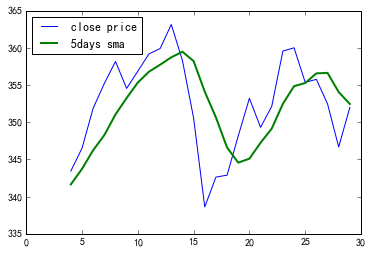

In [26]:
# 创建一个长度为N的数组，并初始化元素的值为1，除以N，得到权重
N = int(raw_input(u"请输入一个正整数：\n"))
weights = 1.0 * np.ones(N) / N
print("权重weights = " +str(weights))
# 使用权重值，调用convolve函数，获取两者做卷积运算时完全重叠的区域
sma = np.convolve(weights, c)[N-1: -N+1]
t = np.arange(N-1, len(c))
plt.plot(t, c[N-1:], lw=1.0, label="close price")  # 每天的收盘价
plt.plot(t, sma, lw=2.0, label=str(N) + 'days sma')  # N日简单移动平均线
plt.legend(loc="upper left")
plt.show()

###### 指数移动平均线
指数移动平均线使用的权重是指数衰减的。对历史上的数据点赋予的权重以指数速度减小，但永远不会到达0.

权重weights = [ 0.11405072  0.14644403  0.18803785  0.24144538  0.31002201]


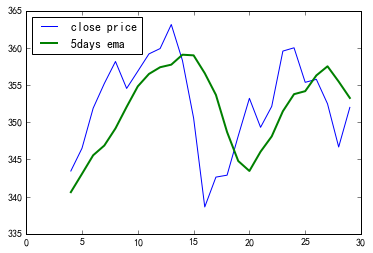

In [27]:
# linspace函数需要一个起始值和一个终止值参数，以及可选的元素个数的参数，返回一个元素值在指定的范围内均匀分别的数组
weights = np.exp(np.linspace(-1., 0., N))
# 对权重值做归一化处理
weights /= weights.sum()
print("权重weights = " + str(weights))
ema = np.convolve(weights, c)[N-1: -N+1]
t = np.arange(N-1, len(c))
plt.plot(t, c[N-1:], lw=1.0, label="close price")
plt.plot(t, ema, lw=2.0, label=str(N) + "days ema")
plt.legend(loc="upper left")
plt.show()

###### 布林带
布林带的基本形态是由三条轨道线组成的带状通道(中轨和上、下轨各一条)。
<ul>
<li><span style="font-weight:bold">中轨</span>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;简单移动平均线。</li>
<li><span style="font-weight:bold">上轨</span>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;比简单移动平均线高两倍标准差的距离。这里的标准差是指计算简单移动平均线所用数据的标准差。</li>
<li><span style="font-weight:bold">下轨</span>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;比简单移动平均线低两倍标准差的距离。</li>
</ul>

[ 329.23044409  335.70890572  318.53386282  321.90858271  327.74175968
  331.5628136   337.94259734  343.84172744  339.99900409  336.58687297
  333.15550418  328.64879207  323.61483771  327.25667796  334.30323599
  335.79295948  326.55905786  324.27329493  325.47601386  332.85867025
  341.63882551  348.75558399  348.48014357  348.01342992  343.56371701
  341.85163786]
[ 336.1   339.32  345.03  344.32  343.44  346.5   351.88  355.2   358.16
  354.54  356.85  359.18  359.9   363.13  358.3   350.56  338.61  342.62
  342.88  348.16  353.21  349.31  352.12  359.56  360.    355.36]
[ 354.05355591  351.73509428  373.93413718  374.62741729  374.33024032
  374.9491864   372.70940266  369.73027256  375.45299591  380.85312703
  385.78849582  387.77920793  384.58516229  374.03132204  358.88476401
  353.33904052  363.63294214  370.19870507  372.79598614  372.08532975
  368.04117449  361.78441601  364.63985643  365.24657008  364.54028299
  363.04836214]
布林带：1.0


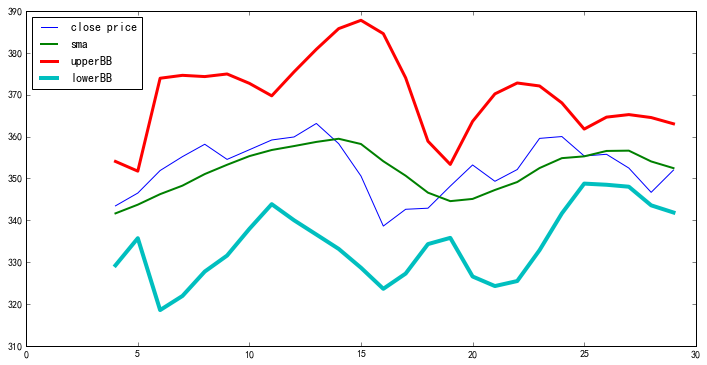

In [28]:
deviation = []
C = len(c)
# 计算标准差
for i in range(N-1, C):
    if i+N < C:
        dev = c[i: i+N]
    else:
        dev = c[-N:]
    averages = np.zeros(N)
    # 将数组元素的值全部设置为一个指定的标量值
    averages.fill(sma[i-N-1])
    dev = dev - averages
    dev = dev ** 2
    dev = np.sqrt(np.mean(dev))
    deviation.append(dev)
# 两倍标准差
deviation = 2 * np.array(deviation)
# 上轨
upperBB = sma + deviation
# 下轨
lowerBB = sma - deviation

c_slice = c[N-1:]
between_bands = np.where((c_slice < upperBB) & (c_slice > lowerBB))
print(lowerBB[between_bands])
print(c[between_bands])
print(upperBB[between_bands])
between_bands = len(np.ravel(between_bands))
print("布林带：" + str(float(between_bands)/len(c_slice)))
t = np.arange(N-1, C)
plt.figure(figsize=(12,6))
plt.plot(t, c_slice, lw=1.0, label="close price")
plt.plot(t, sma, lw=2.0, label="sma")
plt.plot(t, upperBB, lw=3.0, label="upperBB")
plt.plot(t, lowerBB, lw=4.0, label="lowerBB")
plt.legend(loc="upper left")
plt.show()

###### 用线性模型预测价格

In [29]:
# 获取一个包含N个股价的向量b
b = c[-N:]
b = b[::-1]
print("b: " + str(b))

b: [ 351.99  346.67  352.47  355.76  355.36]


In [30]:
# 初始化一个N*N的二维数组A，元素全部为0
A = np.zeros((N, N), float)
# 用b向量中的N个股价值填充数组A
for i in range(N):
    A[i,] = c[-N-1-i: -1-i]
print("A: " + str(A))

A: [[ 360.    355.36  355.76  352.47  346.67]
 [ 359.56  360.    355.36  355.76  352.47]
 [ 352.12  359.56  360.    355.36  355.76]
 [ 349.31  352.12  359.56  360.    355.36]
 [ 353.21  349.31  352.12  359.56  360.  ]]


In [31]:
# 使用linalg包中的lstsq函数来确定线性模型中的系数,原理是最小二乘
(x, residuals, rank, s) = np.linalg.lstsq(A, b)
print("系数向量: " + str(x))
print("残差数组: " + str(residuals))
print("A的秩: " + str(rank))
print("A的奇异值: " + str(s))

系数向量: [ 0.78111069 -1.44411737  1.63563225 -0.89905126  0.92009049]
残差数组: []
A的秩: 5
A的奇异值: [  1.77736601e+03   1.49622969e+01   8.75528492e+00   5.15099261e+00
   1.75199608e+00]


In [32]:
# 使用dot函数计算系数向量与最近N个价格构成的向量的点积
pre_price = np.dot(b,x)
print("预测下一个交易日的收盘价为：" + str(pre_price))

预测下一个交易日的收盘价为：357.939161015


###### 绘制趋势线
阻力位：股价上升时遇到阻力，在转跌前的最高价格；<br>
支撑位：股价下跌时遇到支撑，在价格反弹前的最低价格。<br>
阻力位和支撑位只是一个估计量。

In [33]:
# 确定枢轴点的位置，假设为最高价、最低价和收盘价的算术平均值
h, l, c = np.loadtxt('data.csv', delimiter=',', usecols=(4, 5, 6), unpack=True)
pivots = (h + l + c)/3.0
print("枢轴点：" + str(pivots))

枢轴点：[ 338.01        337.88666667  343.88666667  344.37333333  342.07666667
  345.57        350.92333333  354.29        357.34333333  354.18
  356.06333333  358.45666667  359.14        362.84333333  358.36333333
  353.19333333  340.57666667  341.95666667  342.13333333  347.13
  353.12666667  350.90333333  351.62333333  358.42333333  359.34666667
  356.11333333  355.13666667  352.61        347.11333333  349.77      ]


In [34]:
# 定义一个函数用直线y=ax+b来拟合数据，该函数应返回系数a和b。
# 将直线方程重写y=Ax的形式，其中A =[t 1]，x=[a b]
def fit_line(t, y):
    A = np.vstack([t, np.ones_like(t)]).T
    return np.linalg.lstsq(A, y)[0]

假设支撑位在枢轴点下方一个当日股价区间的位置，而阻力位在枢轴点上方一个当日股价区间的位置，据此拟合支撑位和阻力位的趋势线。

In [35]:
t = np.arange(len(c))
sa, sb = fit_line(t, pivots - (h-l))
ra, rb = fit_line(t, pivots + (h-l))
support = sa * t+sb
resistance = ra * t + rb

第一种方法计算有多少数据点落在支撑位和阻力位之间的范围内：使用where函数和一个条件表达式。

In [36]:
# 设置一个判断数据点是否位于趋势线之间的条件
condition = (c > support) & (c < resistance)
print("条件：" + str(condition))
between_bands = np.where(condition)

条件：[False False  True  True  True  True  True False False  True False False
 False False False  True False False False  True  True  True  True False
 False  True  True  True False  True]


In [37]:
# 复查具体取值
print support[between_bands]
print c[between_bands]
print resistance[between_bands]

[ 341.92421382  342.19081893  342.45742405  342.72402917  342.99063429
  343.79044964  345.39008034  346.4565008   346.72310592  346.98971104
  347.25631615  348.0561315   348.32273662  348.58934174  349.12255197]
[ 345.03  344.32  343.44  346.5   351.88  354.54  350.56  348.16  353.21
  349.31  352.12  355.36  355.76  352.47  351.99]
[ 352.61688271  352.90732765  353.19777259  353.48821753  353.77866246
  354.64999728  356.39266691  357.55444667  357.84489161  358.13533655
  358.42578149  359.2971163   359.58756124  359.87800618  360.45889606]


In [38]:
between_bands = len(np.ravel(between_bands))
print ("位于两条趋势线之间的数据点的个数：" + str(between_bands))
print ("位于两条趋势线之间的数据比例：" + str(float(between_bands)/len(c)))

位于两条趋势线之间的数据点的个数：15
位于两条趋势线之间的数据比例：0.5


In [39]:
# 用模型来预测下一个交易日的阻力位和支撑位
next_support = sa * (t[-1] + 1) +sb
next_resistance = ra * (t[-1] +1) + rb
print("下一个交易日的支撑位：" + str(next_support))
print("下一个交易日的阻力位：" + str(next_resistance))

下一个交易日的支撑位：349.389157088
下一个交易日的阻力位：360.749340996


另一种计算支撑位和阻力位之间数据点个数的方法：使用[]操作符和intersect1d函数。<br>
intersect1d函数返回一个由两个数组的所有公共元素构成的数组。

In [40]:
a1 = c[c > support]
a2 = c[c < resistance]
between_bands2 = len(np.intersect1d(a1, a2))
print("位于两条趋势线之间的数据点的个数: " + str(between_bands2))

位于两条趋势线之间的数据点的个数: 15


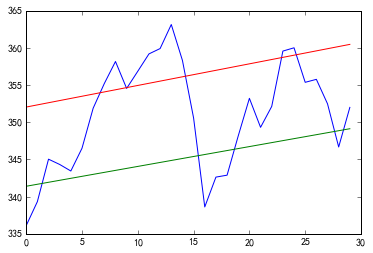

In [41]:
plt.plot(t, c)
plt.plot(t, support)
plt.plot(t, resistance)
plt.show()

###### 数组的修剪和压缩

clip方法返回一个修剪过的数组，也就是将所有比给定最大值还大的元素全部设为给定的最大值，而所有比给定最小值还小的元素全部设为给定的最小值。

In [42]:
a = np.arange(5)
print("a = " + str(a))
print("修剪后: " + str(a.clip(1, 3)))

a = [0 1 2 3 4]
修剪后: [1 1 2 3 3]


compress方法返回一个根据给定条件筛选后的数组

In [43]:
a = np.arange(5)
print("a = " + str(a))
print("压缩后：" + str(a.compress(a>2)))

a = [0 1 2 3 4]
压缩后：[3 4]


###### 阶乘

In [44]:
b = np.arange(1, 9)
print("b = " + str(b))
print("8的阶乘：" + str(b.prod()))
print("数组元素的累积乘积：" + str(b.cumprod()))

b = [1 2 3 4 5 6 7 8]
8的阶乘：40320
数组元素的累积乘积：[    1     2     6    24   120   720  5040 40320]
